In [1]:
import json
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
with open('../data/em1/all.json') as data_file:    
    em1 = json.load(data_file)
with open('../data/sl1/all.json') as data_file:    
    sl1 = json.load(data_file)
with open('../data/si1/all.json') as data_file:    
    si1 = json.load(data_file)
with open('../data/st1/all.json') as data_file:    
    st1 = json.load(data_file)
    
with open('../data/em2/all.json') as data_file:    
    em2 = json.load(data_file)
with open('../data/sl2/all.json') as data_file:    
    sl2 = json.load(data_file)
with open('../data/si2/all.json') as data_file:    
    si2 = json.load(data_file)
with open('../data/st2/all.json') as data_file:    
    st2 = json.load(data_file)
    
with open('../data/em3/all.json') as data_file:    
    em3 = json.load(data_file)
with open('../data/sl3/all.json') as data_file:    
    sl3 = json.load(data_file)
with open('../data/si3/all.json') as data_file:    
    si3 = json.load(data_file)
with open('../data/st3/all.json') as data_file:    
    st3 = json.load(data_file)
    

In [3]:
data = np.concatenate((em1, sl1, si1, st1, em2, sl2, si2, st2, em3, sl3, si3, st3), axis=0)

In [4]:
# np.set_printoptions(threshold=np.nan)
# np.set_printoptions(precision=2,suppress=True)
print (data)

[[ -12.87548276   -4.22414946   -6.07054803 ...,   -4.3226419    -2.30540901
     0.        ]
 [ -14.9968031    -4.01882225   -4.11446593 ...,   -4.3226419    -2.30540901
     0.        ]
 [ -14.9968031    -5.91647598  -10.3663077  ...,   -4.68118213   -0.6687403
     0.        ]
 ..., 
 [-104.04557462  -86.17662367  -73.57463665 ...,  -62.48696167
   -32.62154273    3.        ]
 [ -67.73487263  -65.47202595  -67.28423559 ..., -158.71604215
  -102.38618094    3.        ]
 [-140.69441186 -107.68954938  -88.60602459 ..., -115.41903515
   -73.41549787    3.        ]]


In [5]:
X = data[:, :-1]

In [6]:
y = data[:, -1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Adaboost Classifier

In [8]:
param_grid = {"base_estimator__max_depth" : [3, 4, 5], 
              "base_estimator__splitter" : ["best", "random"], 
              "base_estimator__max_features" : ["auto"], 
              "base_estimator__min_samples_leaf" : [1, 2, 3], 
              "n_estimators" : [100, 200, 400], 
              "learning_rate" : [0.05, 0.1, 0.15, 0.2], 
              "random_state" : [42]}
DT = DecisionTreeClassifier(random_state = 42);
ABC = AdaBoostClassifier(base_estimator = DT);
bdt_discrete = GridSearchCV(estimator = ABC, param_grid=param_grid, n_jobs = 2, cv = 4)
bdt_discrete.fit(X_train, y_train)
# bdt_discrete = AdaBoostClassifier(
#     DecisionTreeClassifier(max_depth=4),
#     n_estimators = 90,
#     learning_rate=0.1,
#     random_state=42)
# bdt_discrete.fit(X_train, y_train)
bdt_discrete.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='random'),
          learning_rate=0.05, n_estimators=100, random_state=42)

# Model Evaluation Metrics

Normalized confusion matrix
[[ 1.     0.     0.     0.   ]
 [ 0.     0.918  0.082  0.   ]
 [ 0.     0.     0.722  0.278]
 [ 0.085  0.017  0.186  0.712]]


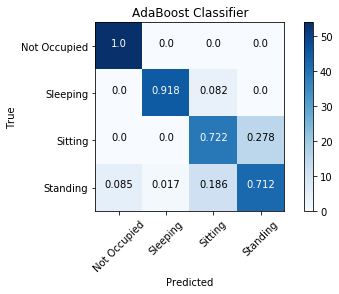

In [25]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j], 3),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predabc)
np.set_printoptions(precision=3)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=np.array(['Not Occupied', 'Sleeping', 'Sitting','Standing'], 
      dtype='|S12'), normalize=True, title='AdaBoost Classifier')

plt.show()

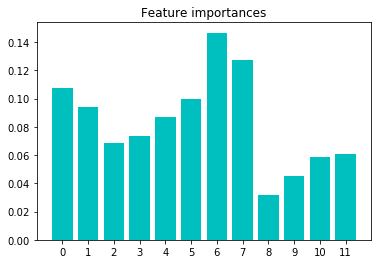

In [32]:
fimportance = bdt_discrete.best_estimator_.feature_importances_ 

# Plot the feature importances of the forest60
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), fimportance,
       color="c", align="center")
plt.xticks(range(X.shape[1]))
plt.xlim([-1, X.shape[1]])
plt.show()

In [24]:
bdt_discrete.best_params_

{'base_estimator__max_depth': 4,
 'base_estimator__max_features': 'auto',
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__splitter': 'random',
 'learning_rate': 0.05,
 'n_estimators': 100,
 'random_state': 42}

In [22]:
from sklearn.metrics import log_loss
log_loss(y_test, bdt_discrete.best_estimator_.predict_proba(X_test))

0.84160381607884061

# Transpile Model

In [201]:
from sklearn_porter import Porter
import os

In [204]:
porter = Porter(bdt_discrete.best_estimator_, language='js')
output = porter.export()
print(output)

var Brain = function(atts) {

    var predict_0 = function(atts) {
        var classes = new Array(4);
        
        if (atts[9] <= -137.87237234538037) {
            if (atts[3] <= -86.395253976494644) {
                if (atts[10] <= -282.86993543081962) {
                    if (atts[2] <= -102.04949703769552) {
                        classes[0] = 0.0; 
                        classes[1] = 0.0; 
                        classes[2] = 0.0; 
                        classes[3] = 0.048611111111111119; 
                    } else {
                        classes[0] = 0.0; 
                        classes[1] = 0.0; 
                        classes[2] = 0.0069444444444444441; 
                        classes[3] = 0.020833333333333332; 
                    }
                } else {
                    if (atts[5] <= -243.43818135755998) {
                        classes[0] = 0.0; 
                        classes[1] = 0.0; 
                        classes[2] = 0.069444444444444461; 
   